In [1]:
import os
import sys
%reload_ext autoreload
%autoreload 2
sys.path.append('../..')
sys.path.append('..')

In [2]:
from split_slow_waves.split_slow_waves import *

In [8]:
from BaselineRemoval import BaselineRemoval

In [9]:
datasets_folder = "../../../../stash"

In [10]:
means = np.array([np.load(f) for f in [os.path.join(datasets_folder, f) for f in os.listdir(datasets_folder)]])

In [11]:
means.shape

(5, 29999)

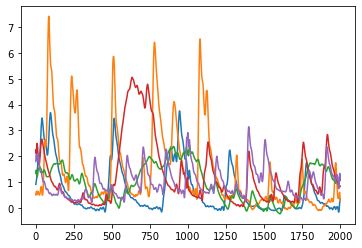

In [12]:
plt.plot(means.T[:2000,:])

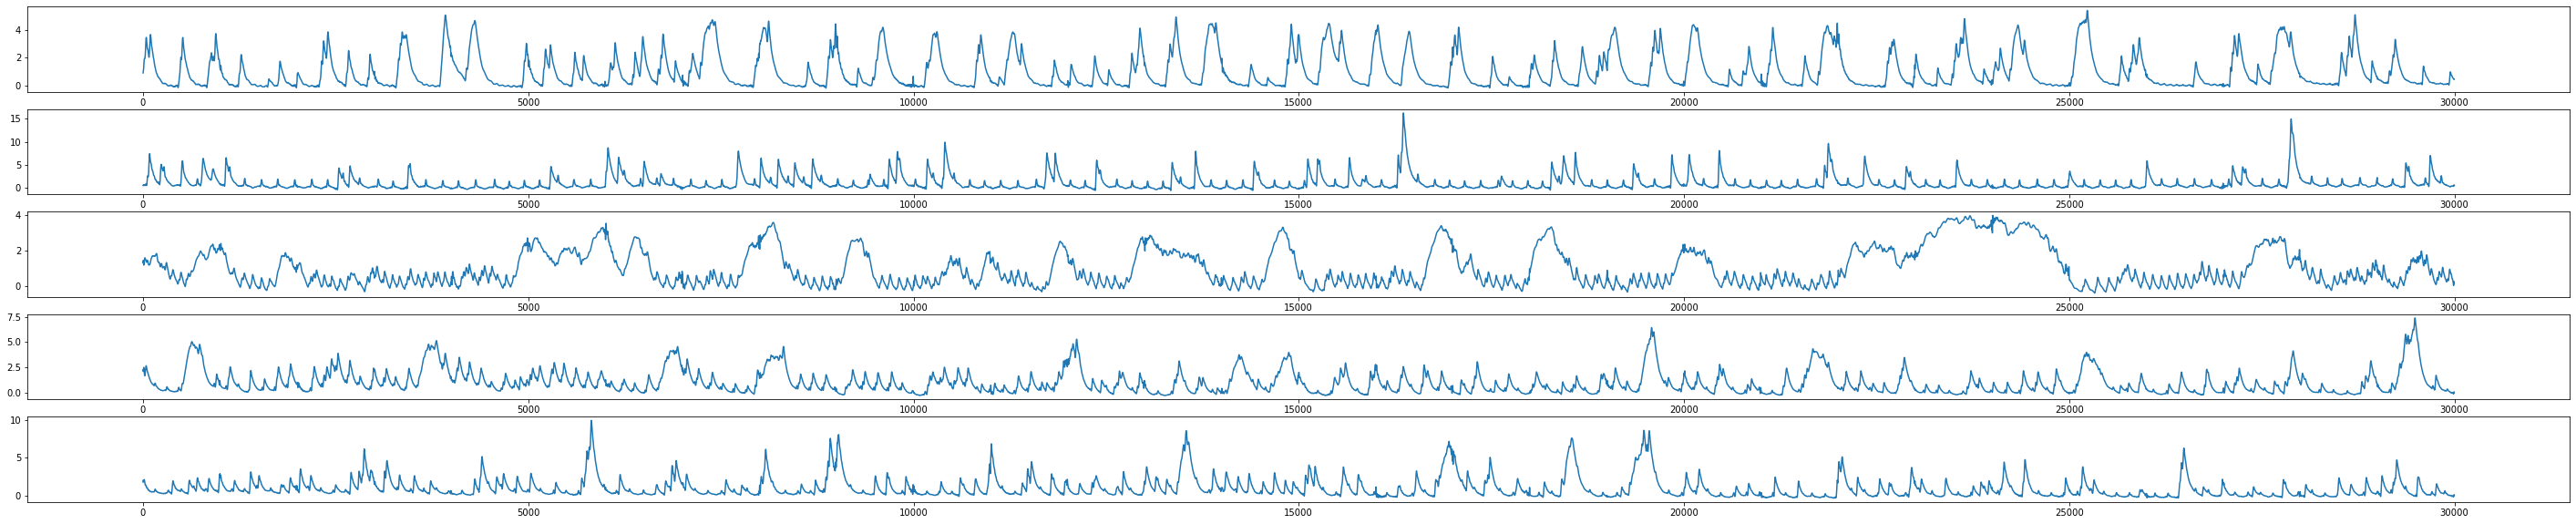

In [30]:
fig,ax = plt.subplots(len(means), figsize=(50,10))
for i, x in enumerate(ax):
    x.plot(means[i])

In [34]:
for n in os.listdir(datasets_folder):
    print(n)

runstart16_mean.npy
runstart23_mean.npy
runstart13_mean.npy
runstart26_mean.npy
runstart20_mean.npy


### A multiscale approach to detect slow waves

A description of the variance of slow waves highly depends on the way the signal is segmented.

What are slow waves?

Generally it was noted that the brain resides in a bistable state during slow wave anaesthesia: There are up-states and down states. Slow waves are immanent as rhythmical patterns in the mean signal in time. For some stages of anaesthesia a clear distinction into down-states and rising activity is possible simply by thresholding the signal. This yields a segmentation where the overall activity during down states is marginal while one can observe a steep rise of activity at the beginning of slow waves, a peak and a phase where the activity diminishes. For other stages this appears to be more difficult as activity does not (always) completely go back to baseline. 

Something about the frequency and delta waves. EEG slow waves in humans.

Something about excitability.

A different way to discern slow waves is based on evaluating local optima in the signal. For example slow wave onset can be defined as the local minimum of the smoothed signal (see ... 2020). Analogously one may consider the peaks in the activity as a marker for the presence of a slow wave. It must be noted, however, that the degree of smoothing has a strong influance on the segmentation of slow waves. Moreover it shows slow-waves do not oscillate in a uniform frequency and amplitude for some stages of anaesthesia. In addition it shows for the high speed recordings at hand that slow waves potentially include several small peaks. Hence smoothing does not only remove noise but also meaningful patterns in the signal.

Hence we suggest a multiscale approach to segment slow waves. It allows to segment slow waves at different degrees of detail.

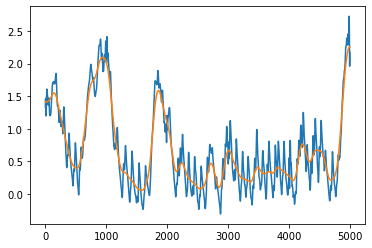

In [51]:
plt.plot(gaussian_filter(means[2][:5000],0))
plt.plot(gaussian_filter(means[2][:5000],50))

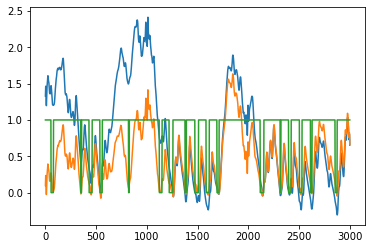

In [13]:
vector = means[2]
baseline_removed = BaselineRemoval(vector).ZhangFit()
plt.plot(vector[:3000])
plt.plot(baseline_removed[:3000])
plt.plot(where_slow_wave(baseline_removed, .3)[:3000])

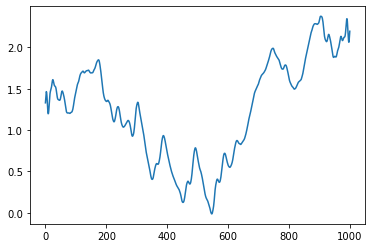

In [14]:
plt.plot(vector[:1000])

In [16]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

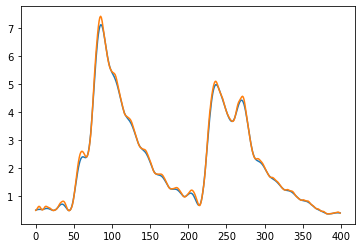

In [17]:
plt.plot(baseline_als(means[1][:400], 6,0.05))
plt.plot(means[1][:400])

In [20]:
vector = means[1]

In [21]:
zhang =BaselineRemoval(vector).ZhangFit()

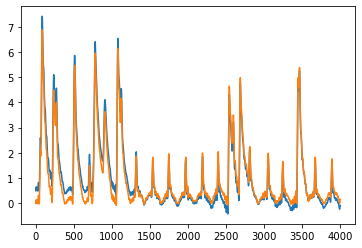

In [22]:
plt.plot(vector[:4000])
plt.plot(zhang[:4000])